In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [2]:
data=pd.read_csv('/kaggle/input/craigslist-carstrucks-data/vehicles.csv')
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
data.info()
data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

<bound method NDFrame.describe of                 id                                                url  \
0       7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1       7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2       7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3       7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4       7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
...            ...                                                ...   
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

                        region                         region_url  price  \
0            

In [4]:
data.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [5]:
columns=data.columns
for i in columns:
    print(data[i].value_counts())

7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: id, Length: 426880, dtype: int64
https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html                     1
https://nh.craigslist.org/cto/d/troy-1998-dodge-ram-59-cummins/7313139418.html                      1
https://nh.craigslist.org/ctd/d/north-hampton-2012-hyundai-sante-fe-se/7313423023.html              1
https://nh.craigslist.org/ctd/d/derry-2008-chrysler-sebring-limited-all/7313423324.html             1
https://nh.craigslist.org/ctd/d/derry-2002-toyota-camry-low-miles/7313424533.html                   1
                                                                                                   ..
https://chicago.craigslist.org/chc/cto/d/pleasant-prairie-2015-f80-m3-700hp-many/7314655506.html    1
https://chicago.craigslist.org/wcl/cto/d/saint-charles-2013-ford-focus-

## Model & Manufacturer

trying to recover manufacturer and model values from url

In [6]:
pd.set_option("max_colwidth" , None)

data[['url','manufacturer','model']]

,url,manufacturer,model
0,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,NaN,NaN
1,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,NaN,NaN
2,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,NaN,NaN
3,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,NaN,NaN
4,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,NaN,NaN
...,...,...,...
426875,https://wyoming.craigslist.org/ctd/d/atlanta-2019-nissan-maxima-sedan-4d/7301591192.html,nissan,maxima s sedan 4d
426876,https://wyoming.craigslist.org/ctd/d/atlanta-2020-volvo-s60-t5-momentum/7301591187.html,volvo,s60 t5 momentum sedan 4d
426877,https://wyoming.craigslist.org/ctd/d/atlanta-2020-caddy-cadillac-xt4-sport/7301591147.html,cadillac,xt4 sport suv 4d
426878,https://wyoming.craigslist.org/ctd/d/atlanta-2018-lexus-es-es-350-sedan-4d/7301591140.html,lexus,es 350 sedan 4d


In [7]:
manufacturers=data.manufacturer.unique()
manufacturers=list(np.delete(manufacturers,0))
print(manufacturers)
print(len(manufacturers))

['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini', 'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson', 'datsun', 'aston-martin', 'land rover', 'morgan']
42


In [8]:
for i in data[data.manufacturer.isnull()].index:
    link=data.url[i]
    
    for brand in manufacturers:
        
        if brand in link:
            data.at[i,'manufacturer'] = brand
            break
    

In [9]:
data.manufacturer.isnull().sum()

13232

In [10]:
models=data.model.unique()
models=list(np.delete(models,0))
#print(models)

models=sorted(models,key=len)[::-1]

print(len(models))

29667


In [11]:
for i in data[data.model.isnull()].index:
    link=data.url[i].replace('-',' ')
    
    for model in models:
        
        if model in link:
            data.at[i,'model'] = model.replace('-',' ')
            break

In [12]:
data.model.isnull().sum()

0

In [13]:
data= data.drop(columns=['id','url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long','county','region','posting_date'], axis=1)

In [14]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,NaN,ford,ranger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,hyundai,elantra se,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,excursion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,honda,odyssey ex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,chevrolet,truck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [15]:
data.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


## Price

In [16]:
price=sorted(data.price)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

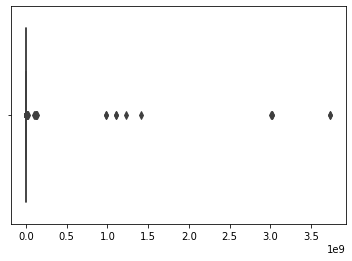

In [17]:
import seaborn as sns

sns.boxplot(price)

In [18]:
quartile1, quartile3= np.percentile(price,[10,90])
print(quartile1,quartile3)

500.0 37590.0


In [19]:
data=data[(data.price < 37590) & (data.price >= 500 )]
data.shape

(341976, 15)

## Odometer

In [20]:
odometer=sorted(data["odometer"])
data.odometer.isna().sum()

1889

<AxesSubplot:xlabel='odometer', ylabel='price'>

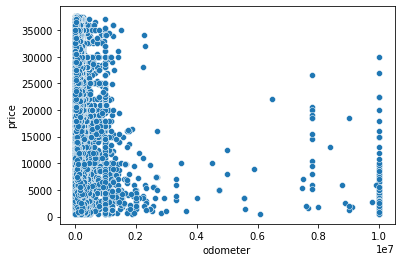

In [21]:
sns.scatterplot(x="odometer", y="price", data=data)

In [22]:
data[data.odometer==0]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
694,3980,2013.0,kia,rio,NaN,4 cylinders,gas,0.0,NaN,manual,fwd,NaN,sedan,white,al
1720,10477,2009.0,chevrolet,colorado,NaN,NaN,gas,0.0,clean,automatic,NaN,NaN,NaN,black,al
1804,11980,2013.0,infiniti,g37 sedan,NaN,6 cylinders,gas,0.0,NaN,automatic,rwd,NaN,sedan,silver,al
3959,4500,1997.0,gmc,sierra,good,6 cylinders,gas,0.0,clean,automatic,rwd,mid-size,truck,blue,al
4267,4250,1995.0,ford,f150,good,8 cylinders,gas,0.0,clean,automatic,rwd,full-size,pickup,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417977,16900,2013.0,ford,e-350,NaN,NaN,gas,0.0,clean,other,NaN,NaN,other,white,wi
418235,4900,2011.0,NaN,IC CE PB105,NaN,NaN,diesel,0.0,clean,other,NaN,NaN,bus,yellow,wi
421403,999,2019.0,ford,transit,NaN,NaN,gas,0.0,clean,automatic,NaN,NaN,NaN,NaN,wi
423311,4900,2011.0,NaN,IC CE PB105,NaN,NaN,diesel,0.0,clean,other,NaN,NaN,bus,yellow,wi


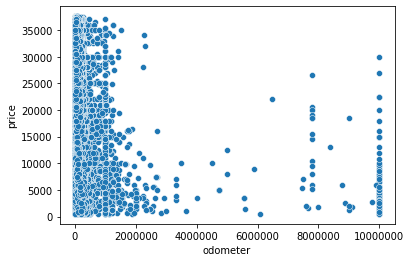

In [23]:
ax = sns.scatterplot(x="odometer", y="price", data=data)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [24]:
data=data[(data.odometer < 2000000)]

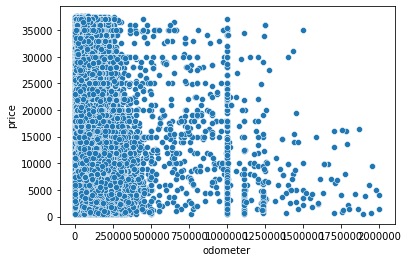

In [25]:
ax = sns.scatterplot(x="odometer", y="price", data=data)
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [26]:
data=data.dropna(subset=['year'])
data.drop(data[data["year"]==0.0].index,inplace=True)

<AxesSubplot:xlabel='year', ylabel='price'>

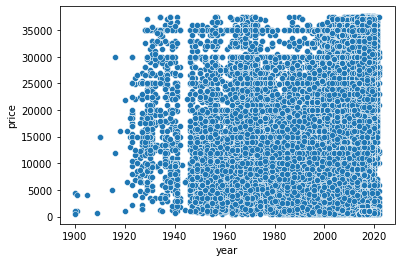

In [27]:
sns.scatterplot(x="year", y="price", data=data)

In [28]:
data=data[data.year>1921]

In [29]:
data=data[data.year<2021]

In [30]:
null_values=data.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])

sum_tot=len(data)
null_values['percent']=null_values['null']/sum_tot
round(null_values,3).sort_values('percent',ascending=False)

# null value percentage

,null,percent
size,237196,0.701
cylinders,135944,0.402
condition,123105,0.364
drive,104218,0.308
paint_color,98082,0.290
type,74596,0.220
manufacturer,9704,0.029
title_status,5793,0.017
fuel,1963,0.006
transmission,1287,0.004


In [31]:
data.condition.value_counts()

good         104921
excellent     85555
like new      17160
fair           6542
new             580
salvage         542
Name: condition, dtype: int64

the misssing values in the condition can be found using odometer as mileage affects condition of car

In [32]:
excellent_odo_mean = data[data['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = data[data['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = data[data['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = data[data['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = data[data['condition'] == 'fair']['odometer'].mean()

In [33]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 88451.63
Excellent average odometer: 110765.7
Good average odometer: 86084.63
Fair average odometer: 172861.46
Salvage average odometer: 163053.91


In [34]:
data.loc[data.year==2020, 'condition'] = data.loc[data.year==2020, 'condition'].fillna('new')

In [35]:
data.loc[data['odometer'] <= like_new_odo_mean, 'condition'] = data.loc[data['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

data.loc[data['odometer'] >= fair_odo_mean, 'condition'] = data.loc[data['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

data.loc[((data['odometer'] > good_odo_mean) & 
       (data['odometer'] <= excellent_odo_mean)), 'condition'] = data.loc[((data['odometer'] > good_odo_mean) & 
       (data['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

data.loc[((data['odometer'] > like_new_odo_mean) & 
       (data['odometer'] <= good_odo_mean)), 'condition'] = data.loc[((data['odometer'] > like_new_odo_mean) & 
       (data['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

data.loc[((data['odometer'] > good_odo_mean) & 
       (data['odometer'] <= fair_odo_mean)), 'condition'] = data.loc[((data['odometer'] > good_odo_mean) & 
       (data['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='odometer'>

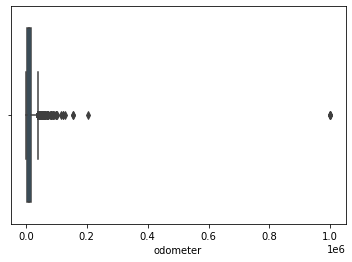

In [36]:
sns.boxplot(data[data.year==2020].odometer)

In [37]:
data.drop(data[(data.year==2020) & (data.odometer>70000)].index,inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='odometer'>

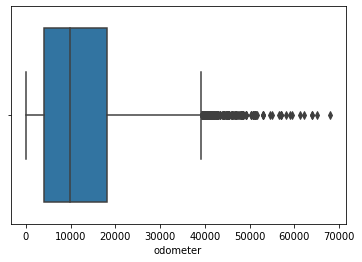

In [38]:
sns.boxplot(data[data.year==2020].odometer)

In [39]:
null_values=data.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])

sum_tot=len(data)
null_values['percent']=null_values['null']/sum_tot
round(null_values,3).sort_values('percent',ascending=False)

,null,percent
size,237174,0.701
cylinders,135923,0.402
drive,104210,0.308
paint_color,98070,0.290
type,74581,0.220
manufacturer,9701,0.029
title_status,5793,0.017
fuel,1963,0.006
transmission,1287,0.004
price,0,0.000


In [40]:
data=data.dropna(subset=['title_status','transmission','manufacturer','fuel'])

In [41]:
data=data.drop(["size"],axis=1)

In [42]:
null_values=data.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])

sum_tot=len(data)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
cylinders,12897300,40.250
drive,9672300,30.185
paint_color,8971600,27.998
type,7078300,22.090
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


In [43]:
data['paint_color'] = data['paint_color'].fillna(method='ffill')  ## paint forward fill

## Type

In [44]:
print(data.type.unique())      

['pickup' 'truck' nan 'other' 'SUV' 'hatchback' 'mini-van' 'sedan' 'coupe'
 'offroad' 'convertible' 'wagon' 'van' 'bus']


## Type

In [45]:
cars=data[data.type.isnull()]
cars=cars[['manufacturer','model']].value_counts().reset_index()
cars

,manufacturer,model,0
0,ford,f-150,1256
1,chevrolet,silverado 1500,766
2,ram,1500,716
3,nissan,altima,666
4,jeep,wrangler,663
...,...,...,...
8176,kia,sorento lx awd,1
8177,kia,sorento lx suv,1
8178,kia,sorento suv,1
8179,dodge,grand caravan sxt v6,1


In [48]:
for i in cars.index:
    brand=cars.at[i,'manufacturer']
    model=cars.at[i,'model']
    
    types= data[(data.manufacturer==brand) & (data.model==model)].type.mode()
    
    if(len(types)>0):
    
        data.loc[(data.manufacturer==brand) & (data.model==model), 'type'] = data.loc[(data.manufacturer==brand) & (data.model==model),'type'].fillna(types[0])

## Drive

In [49]:
cars=data[data.drive.isnull()]
cars=cars[['manufacturer','model']].value_counts().reset_index()
cars

,manufacturer,model,0
0,ford,f-150,1102
1,honda,accord,855
2,honda,civic,791
3,nissan,altima,672
4,chevrolet,silverado 1500,671
...,...,...,...
8915,gmc,caballero,1
8916,gmc,c7h top kick,1
8917,gmc,c7500 service truck w crane,1
8918,gmc,c7500 enclosed service truc,1


In [50]:
for i in cars.index:
    brand=cars.at[i,'manufacturer']
    model=cars.at[i,'model']
    
    drive= data[(data.manufacturer==brand) & (data.model==model)].drive.mode()
    
    if(len(drive)>0):
    
        data.loc[(data.manufacturer==brand) & (data.model==model), 'drive'] = data.loc[(data.manufacturer==brand) & (data.model==model),'drive'].fillna(drive[0])

## Cylinders

In [51]:
cars=data[data.cylinders.isnull()]
cars=cars[['manufacturer','model']].value_counts().reset_index()
cars

,manufacturer,model,0
0,ford,f-150,2644
1,ram,1500,1241
2,chevrolet,silverado,1199
3,chevrolet,silverado 1500,1177
4,nissan,altima,1088
...,...,...,...
9605,ford,couier,1
9606,ford,courier,1
9607,ford,crestline,1
9608,mazda,mazda3 sport,1


In [52]:
for i in cars.index:
    brand=cars.at[i,'manufacturer']
    model=cars.at[i,'model']
    
    cylinders= data[(data.manufacturer==brand) & (data.model==model)].cylinders.mode()
    
    if(len(cylinders)>0):
    
        data.loc[(data.manufacturer==brand) & (data.model==model), 'cylinders'] = data.loc[(data.manufacturer==brand) & (data.model==model),'cylinders'].fillna(cylinders[0])

In [53]:
null_values=data.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])

sum_tot=len(data)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
cylinders,2758900,8.610
drive,1502800,4.690
type,645100,2.013
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000
odometer,0,0.000


In [54]:
data['drive'] = data['drive'].fillna(method='ffill')
data['type'] = data['type'].fillna(method='ffill')
data['cylinders'] = data['cylinders'].fillna(method='ffill')

In [55]:
data.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [56]:
from scipy import stats

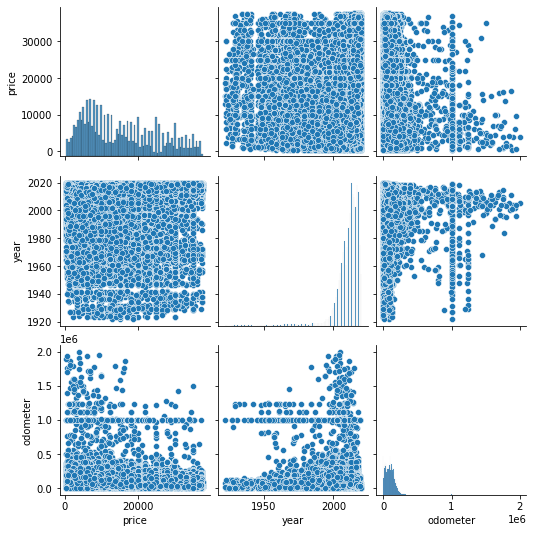

In [57]:
sns.pairplot(data)

In [58]:
columns=data.columns
for i in columns:
    print(data[i].value_counts())

6995     3057
7995     2990
8995     2699
9995     2690
4500     2670
         ... 
8972        1
7892        1
13672       1
5772        1
19853       1
Name: price, Length: 11090, dtype: int64
2013.0    25157
2017.0    24759
2018.0    23484
2014.0    23179
2015.0    22663
          ...  
1925.0        6
1922.0        3
1944.0        3
1945.0        2
1943.0        1
Name: year, Length: 99, dtype: int64
ford               53224
chevrolet          41587
toyota             27485
honda              18709
nissan             15756
jeep               14653
gmc                11986
bmw                11753
ram                11055
dodge              10561
hyundai             8836
subaru              8460
mercedes-benz       8298
volkswagen          8254
kia                 6958
lexus               6868
audi                5598
cadillac            5541
chrysler            5392
mazda               4858
buick               4706
acura               4607
infiniti            4018
lincoln          

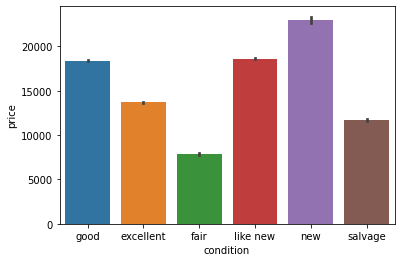

In [59]:
ax = sns.barplot(x="condition", y="price", data=data)

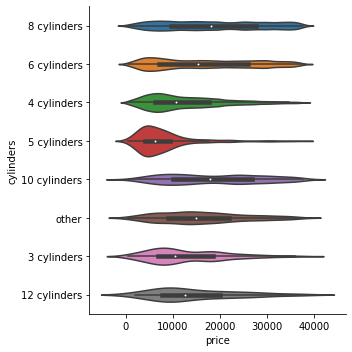

In [60]:
sns.catplot(y="cylinders", x="price",kind = "violin", data=data)

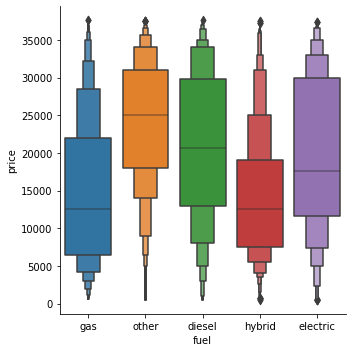

In [61]:
sns.catplot(x="fuel", y="price", kind="boxen",data=data)

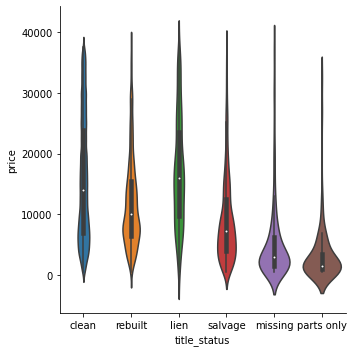

In [62]:
sns.catplot(x="title_status", y="price",kind="violin", data=data)

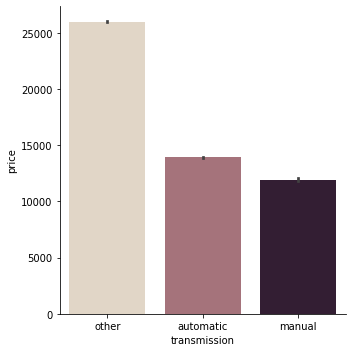

In [63]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=data)

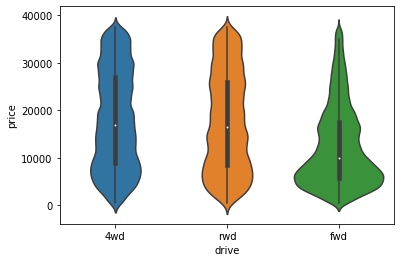

In [64]:
sns.violinplot(x=data.drive, y=data.price);

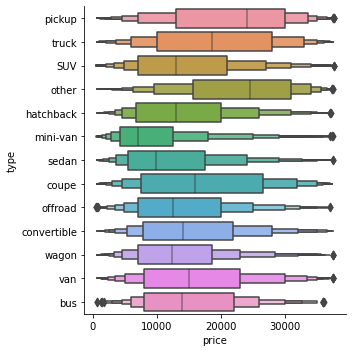

In [65]:
sns.catplot(y="type", x="price",kind="boxen", data=data);

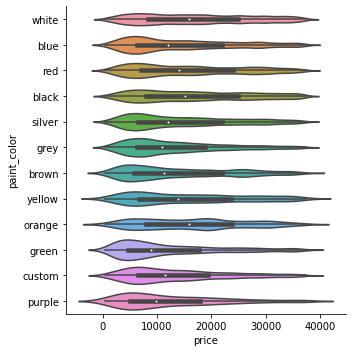

In [66]:
sns.catplot(y="paint_color", x="price",kind="violin", data=data);

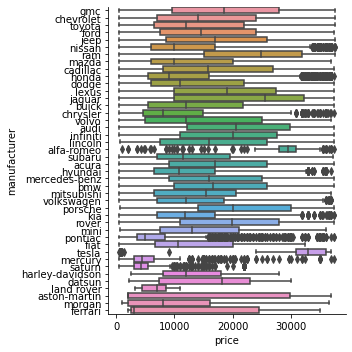

In [67]:
sns.catplot(y="manufacturer", x="price",kind="box", data=data);

## Label processing

In [68]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [69]:
data[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=data[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

In [70]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [71]:
y= data.price
X= data.drop('price',axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [73]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(224302, 13) (224302,)
(96130, 13) (96130,)


## Model Training

## Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [75]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [76]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('r2_score : ',regressor.score(X_test,y_test)*100)

Mean Absolute Error: 1746.74
Mean Squared Error: 10514840.35
Root Mean Squared Error: 3242.66
r2_score :  89.4327990088628


## Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)

In [78]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('r2_score : ',lr.score(X_test,y_test)*100)

Mean Absolute Error: 5476.55
Mean Squared Error: 53355770.47
Root Mean Squared Error: 7304.5
r2_score :  46.37853437025194


## SVR

In [ ]:
# from sklearn.svm import SVR
# model=SVR()
# model.fit(X_train,y_train)
# y_pred=model.predict(X_test)

In [ ]:
# print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
# print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
# print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
# print('r2_score : ',model.score(X_test,y_test)*100)

## Decission Tree Regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [80]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('r2_score : ',model.score(X_test,y_test)*100)

Mean Absolute Error: 2086.75
Mean Squared Error: 19009812.92
Root Mean Squared Error: 4360.02
r2_score :  80.89552411740728
